In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('product_tweet-emotion_data.csv',encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [9]:
df.rename(columns={"tweet_text":'review',"emotion_in_tweet_is_directed_at":'product',"is_there_an_emotion_directed_at_a_brand_or_product":'emotion'},inplace = True)
df.head()

,review,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   9092 non-null   object
 1   product  3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


  <h1><center>Dealing with null values</center></h1>

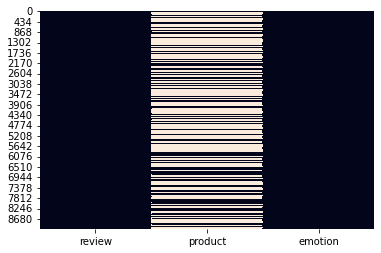

In [11]:
sns.heatmap(df.isnull(),cbar=False)

**We can see that most of the values in the product column are null values and hence would not provide great insights for the data, so it would be better to drop the column**

In [12]:
df.drop('product',axis=1,inplace=True)
df.head()

,review,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [13]:
df.isnull().sum()  # some product reviews seems empty

review     1
emotion    0
dtype: int64

In [14]:
df.dropna(inplace=True) # dropping the rows having no reviews

In [15]:
df.isnull().sum() 

review     0
emotion    0
dtype: int64

In [16]:
df.info()   # removed every null value now we need to process the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   9092 non-null   object
 1   emotion  9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


  <h1><center>Text Preprocessing</center></h1>

In [17]:
df.head()

,review,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


### Emotion column

In [18]:
df['emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [19]:
# combining "I can't tell" with "No emotion toward brand or product"
df['emotion'].replace("I can't tell","No emotion toward brand or product",inplace=True)

In [20]:
df['emotion'].value_counts()

No emotion toward brand or product    5544
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [21]:
# mapping each of the types to a numeric value
# "Negative emotion" -----> 0
# "No emotion toward brand or product" -----> 1
# "Positive emotion" -----> 2
df['emotion']=df['emotion'].map({"Negative emotion":0,"No emotion toward brand or product":1,"Positive emotion":2})

In [22]:
df['emotion'].value_counts()

1    5544
2    2978
0     570
Name: emotion, dtype: int64

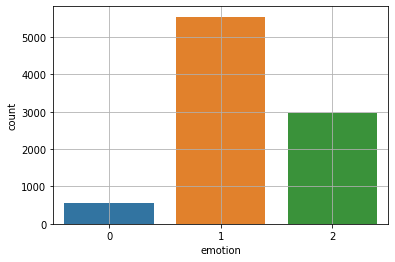

In [23]:
sns.countplot(x='emotion',data=df)
plt.grid()


cleaning and analyzing data for any redundancy 


In [24]:
import re

In [25]:
# converting the text to lowercase
df['review']=df['review'].apply(lambda x:x.lower())

In [26]:
df.head()

,review,emotion
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,0
1,@jessedee know about @fludapp ? awesome ipad/i...,2
2,@swonderlin can not wait for #ipad 2 also. the...,2
3,@sxsw i hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on fri #sxsw: marissa m...,2


In [27]:
# removing hyperlinks from the text
df['review']=df['review'].apply(lambda x:re.sub('http[s]?://\S+',' ', x))

In [28]:
# removing non alphabetical characters from the text
df['review']=df['review'].apply(lambda x:re.sub(r'[^a-z]+',' ',x))

In [29]:
df.head()

,review,emotion
0,wesley i have a g iphone after hrs tweeting a...,0
1,jessedee know about fludapp awesome ipad ipho...,2
2,swonderlin can not wait for ipad also they sh...,2
3,sxsw i hope this year s festival isn t as cra...,0
4,sxtxstate great stuff on fri sxsw marissa may...,2


In [30]:
# multiple spaces to a single space
df['review']=df['review'].apply(lambda x:" ".join(x.split()))

In [31]:
df.head()

,review,emotion
0,wesley i have a g iphone after hrs tweeting at...,0
1,jessedee know about fludapp awesome ipad iphon...,2
2,swonderlin can not wait for ipad also they sho...,2
3,sxsw i hope this year s festival isn t as cras...,0
4,sxtxstate great stuff on fri sxsw marissa maye...,2


### Tokenizing and removing stopwords

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
def stopwords_removal(text):
    return [w for w in text.split() if w not in stopwords.words('english')]

In [34]:
df['review']=df['review'].apply(stopwords_removal)

In [35]:
df.head()

,review,emotion
0,"[wesley, g, iphone, hrs, tweeting, rise, austi...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [36]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [37]:
def lemmatizer(text):
    lemma=WordNetLemmatizer()
    return [lemma.lemmatize(w) for w in text]

In [38]:
df['review']=df['review'].apply(lemmatizer)

In [39]:
df.head()

,review,emotion
0,"[wesley, g, iphone, hr, tweeting, rise, austin...",0
1,"[jessedee, know, fludapp, awesome, ipad, iphon...",2
2,"[swonderlin, wait, ipad, also, sale, sxsw]",2
3,"[sxsw, hope, year, festival, crashy, year, iph...",0
4,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...",2


In [40]:
# joining the list of words to form the review
df['review']=df['review'].apply(lambda x:" ".join(x))
df.head()

,review,emotion
0,wesley g iphone hr tweeting rise austin dead n...,0
1,jessedee know fludapp awesome ipad iphone app ...,2
2,swonderlin wait ipad also sale sxsw,2
3,sxsw hope year festival crashy year iphone app...,0
4,sxtxstate great stuff fri sxsw marissa mayer g...,2


### Bag of Words transformer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# fitting the bow transformer to the text column and transforming it
bow_transformer=CountVectorizer().fit(df['review'])

In [43]:
# total number of different words present in the corpus
print(len(bow_transformer.vocabulary_))

8363


In [44]:
sample_text=df['review'][0]
sample_text

'wesley g iphone hr tweeting rise austin dead need upgrade plugin station sxsw'

In [45]:
# vector representation of the sample_text
bow_sample=bow_transformer.transform([sample_text])
print(bow_sample)

  (0, 467)	1
  (0, 1784)	1
  (0, 3489)	1
  (0, 3805)	1
  (0, 4869)	1
  (0, 5507)	1
  (0, 6194)	1
  (0, 6942)	1
  (0, 7163)	1
  (0, 7684)	1
  (0, 7820)	1
  (0, 8090)	1


In [46]:
# applying the bow transformer to the entire column
text_bow=bow_transformer.transform(df['review'])

In [47]:
print("The shape of the matrix is: ",text_bow.shape)
# 9092 different reviews and 8363 unique words in the entire corpus

The shape of the matrix is:  (9092, 8363)


In [48]:
print("The number of non zero values in the matrix: ",text_bow.nnz)

The number of non zero values in the matrix:  103180


In [49]:
print("Sparcity of the matrix: ",100*text_bow.nnz/(text_bow.shape[0]*text_bow.shape[1]))

Sparcity of the matrix:  0.13569817275400586


The matrix is very sparse since most of the values would be zero

### Term Frequency - Inverse Document Frequency (Tf-Idf) Transformer

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
tfidf_transformer=TfidfTransformer().fit(text_bow)
tfidf_sample=tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 8090)	0.40655838788261534
  (0, 7820)	0.3225935602043775
  (0, 7684)	0.2911705162256961
  (0, 7163)	0.04319211497984557
  (0, 6942)	0.3257912736828193
  (0, 6194)	0.3292450673535963
  (0, 5507)	0.36702100562355766
  (0, 4869)	0.20163028170095382
  (0, 3805)	0.11910344779769212
  (0, 3489)	0.35250243528765235
  (0, 1784)	0.3094165296034994
  (0, 467)	0.14111767938924372


In [52]:
# applying the tfidf_transformer to the entire column
text_tfidf=tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(9092, 8363)


### Train Test Split

In [53]:
X=df['review']
y=df['emotion']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# splitting the dataset into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [56]:
print(len(X_train),len(X_test),len(X_train)+len(X_test))

6819 2273 9092


  <h1><center>Model Creation and Evaluation</center></h1>

The task of Bag-of-Words transformer followed by the Tf-Idf transformer and model creation can all be done in one single step using a pipeline provided by Scikit Learn

In [57]:
from sklearn.pipeline import Pipeline

### Multinomial Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

In [59]:
pipe1=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',MultinomialNB())  # classification algorithm
])

In [60]:
# fitting the pipeline
pipe1.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
# making predictions
predictions_nb=pipe1.predict(X_test)

In [62]:
predictions_nb

array([1, 1, 1, ..., 2, 1, 1])

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
def metrics(y_true,y_pred):
    print(classification_report(y_true,y_pred))
    print("\n")
    print(confusion_matrix(y_true,y_pred))

In [65]:
metrics(y_test,predictions_nb)

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       148
           1       0.65      0.96      0.77      1382
           2       0.69      0.21      0.32       743

    accuracy                           0.65      2273
   macro avg       0.78      0.39      0.37      2273
weighted avg       0.68      0.65      0.57      2273



[[   1  138    9]
 [   0 1321   61]
 [   0  589  154]]


### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
pipe2=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',LogisticRegression())  # classification algorithm
])

In [68]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [69]:
predictions_lg=pipe2.predict(X_test)

In [70]:
metrics(y_test,predictions_lg)

              precision    recall  f1-score   support

           0       0.73      0.05      0.10       148
           1       0.70      0.89      0.79      1382
           2       0.66      0.46      0.54       743

    accuracy                           0.69      2273
   macro avg       0.70      0.47      0.48      2273
weighted avg       0.69      0.69      0.66      2273



[[   8  117   23]
 [   3 1228  151]
 [   0  401  342]]


### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
pipe3=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',RandomForestClassifier(n_estimators=400))  # classification algorithm
])

In [73]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=400))])

In [74]:
predictions_rf=pipe3.predict(X_test)

In [75]:
metrics(y_test,predictions_rf)

              precision    recall  f1-score   support

           0       0.59      0.16      0.25       148
           1       0.69      0.90      0.78      1382
           2       0.70      0.40      0.51       743

    accuracy                           0.69      2273
   macro avg       0.66      0.49      0.52      2273
weighted avg       0.69      0.69      0.66      2273



[[  24  111   13]
 [  16 1250  116]
 [   1  445  297]]


### SVM

In [76]:
from sklearn.svm import SVC

In [77]:
pipe4=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',SVC())  # classification algorithm
])

In [78]:
pipe4.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [79]:
predictions_svc=pipe4.predict(X_test)

In [80]:
metrics(y_test,predictions_svc)

              precision    recall  f1-score   support

           0       0.81      0.11      0.20       148
           1       0.70      0.91      0.79      1382
           2       0.71      0.45      0.55       743

    accuracy                           0.71      2273
   macro avg       0.74      0.49      0.51      2273
weighted avg       0.71      0.71      0.68      2273



[[  17  116   15]
 [   4 1257  121]
 [   0  411  332]]


**Hyper-Parameter Tuning**

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# For using RandomizedSearchCV we would need to specify the parameters and their corresponding values on which it would work
# and find the best values

C=[0.1,1,10,20,50,100]
gamma=[0.0001,0.001,0.1,1,10]
kernel=['rbf','linear','sigmoid']

In [83]:
random_grid = {'C': C,
               'gamma': gamma,
               'kernel': kernel}

In [84]:
model_svc_tuned=SVC()

In [85]:
SVC_tuned = RandomizedSearchCV(estimator = model_svc_tuned, 
                  
                               param_distributions = random_grid, 
                               n_iter = 40, cv = 3, verbose=2, 
                               random_state=42,n_jobs=-1)

In [86]:
# we need to split the data based on the tfidf transformed matrix which earlier was done as part of the pipeline
X_train_tuned, X_test_tuned, y_train_tuned, y_test_tuned = train_test_split(text_tfidf, df['emotion'], test_size=0.25)

In [88]:
SVC_tuned.fit(X_train_tuned,y_train_tuned)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 20, 50, 100],
                                        'gamma': [0.0001, 0.001, 0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'sigmoid']},
                   random_state=42, verbose=2)

In [89]:
SVC_tuned.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [90]:
predictions_svc_tuned=SVC_tuned.predict(X_test_tuned)

In [91]:
metrics(y_test_tuned,predictions_svc_tuned)

              precision    recall  f1-score   support

           0       0.57      0.19      0.29       135
           1       0.71      0.83      0.77      1382
           2       0.63      0.51      0.56       756

    accuracy                           0.69      2273
   macro avg       0.63      0.51      0.54      2273
weighted avg       0.68      0.69      0.67      2273



[[  26   94   15]
 [  16 1152  214]
 [   4  369  383]]


### K Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
pipe5=Pipeline([
    ('bow',CountVectorizer()),    # strings to integer token counts
    ('tfidf',TfidfTransformer()),  # tokens counts to TF-IDF weights
    ('classifier',KNeighborsClassifier(n_neighbors=5))  # classification algorithm
])

In [94]:
pipe5.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier())])

In [95]:
predictions_knn=pipe5.predict(X_test)

In [96]:
metrics(y_test,predictions_knn)

              precision    recall  f1-score   support

           0       0.43      0.16      0.23       148
           1       0.66      0.85      0.74      1382
           2       0.53      0.33      0.41       743

    accuracy                           0.63      2273
   macro avg       0.54      0.44      0.46      2273
weighted avg       0.61      0.63      0.60      2273



[[  23  101   24]
 [  20 1169  193]
 [  10  488  245]]
